## Daily Challenge: W6_D1

### Text Analysis of books using word cloud

**NLP Daily Challenge**

---

**Important**
Create a virtual environment for the NLP course and always work inside it.

---

**Text preprocessing**

For these exercises, we will be using **NLTK** and **spaCy**.

The corpus will be the Lewis Carroll books:

- Alice’s Adventures in Wonderland
- Through the Looking-Glass And What Alice Found There
- A Tangled Tale

---

**1️⃣ Using requests to access the contents online, create a function load_texts().**
This function should receive a list of URLs, load them, clean non-words using regular expressions, and append the cleaned text to the corpus that will be returned.

---

**2️⃣ Print the first 200 characters of each text.**

**Question:** Are there parts of the text that are not relevant to the analysis?  
If so, you need to remove them.

**Hint:** You can use slicing to start and stop the text where you need (ignoring author credits in the beginning and end) by looking for the following phrases:

- START
- END

---

**3️⃣ Tokenize the text and print the first 150 tokens of each book.**

---

**4️⃣ Remove stopwords using NLTK.**
Check that they were removed using count() and looking for some of the stop words like:
- i, me, my, myself, we, our, ours, ourselves, etc.

---

**5️⃣ Using PorterStemmer(), print the first 50 stemmed tokens.**

---

**6️⃣ Using spaCy pre-trained model en_core_web_sm, load and print the first 50 lemmatized tokens.**
**Hint:** In spaCy, the lemmatized token can be accessed as an attribute.

---

**7️⃣ Analyse the difference between the stemmed and lemmatized tokens.**
What is different and why?

---

**8️⃣ Using NLTK, identify POS (Part-of-Speech) tags of each text.**

---

**9️⃣ Using NLTK, identify all the entities of each text.**

---

**Analysing the text**

---

**1️⃣ Using wordcloud and matplotlib, display a word cloud of each book.**

The output will look like this (maybe not exactly):

*(Word cloud example)*

---

**2️⃣ Use BoW method to check the five most frequent words in all the books.**

**Hint:** What will be the best text from the preprocessing step? (raw text, stemmed, lemmatized, etc.)

---

**3️⃣ Print the BoW and identify the numbers:**
- What is the document number?
- What is the index?
- How many times was the word found?

---

**4️⃣ Display a pie plot of the 5 most frequent words in the text.**
Add the word and its frequency as labels.

---

**5️⃣ Analyse the outputs:**
Are those words informative? Are they insightful or expected?

*(Pie chart example)*

---

**Solving the frequency problem using TF-IDF**

When we create a BoW from some text, all the words are treated equally as important.  
For example, words like **Alice** or **said** in a fantasy book about Alice.  
We expect those words to be repeated all over the book, making them not so informative.

The solution for this problem is to consider the frequency relative to the corpus.  
If a word appears in a document but not much in the other documents, it is likely meaningful and should be considered more important.  
Conversely, a word repeated a lot in all the documents will be considered less important.

That’s the perfect situation to use **TF-IDF (Term Frequency – Inverse Document Frequency).**

---

**1️⃣ Create another BoW, now using TF-IDF as vectorizer.**

**Hint:** You need to pass min_df=1, max_df=2 as arguments of TfidfVectorizer(), because we are using a small dataset.

---

**2️⃣ Create again the pie plots with the new 5 most relevant words from each document.**

### Code – load_texts() function

In [60]:
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [26]:
def load_texts(urls):
    """
    This function receives a list of URLs,
    downloads the content of each URL,
    cleans non-word characters,
    and returns a list of cleaned texts.
    """
    corpus = []

    for url in urls:
        # Download the text from the URL
        response = requests.get(url)
        raw_text = response.text

        # Remove non-word characters (keep letters, spaces, punctuation)
        cleaned_text = re.sub(r'[^A-Za-z0-9\s.,;:!?\'"-]', ' ', raw_text)

        # Optional: Collapse multiple spaces into one
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

        # Append the cleaned text to the corpus
        corpus.append(cleaned_text)

    return corpus

### Download and clean Lewis Carroll texts

In [29]:
# Save texts locally
for i, text in enumerate(corpus):
    with open(f"text_{i+1}.txt", "w", encoding="utf-8") as f:
        f.write(text)

In [30]:
# Load texts from files
corpus = []
for i in range(3):
    with open(f"text_{i+1}.txt", "r", encoding="utf-8") as f:
        corpus.append(f.read())

In [31]:
def load_texts(urls):
    """
    This function receives a list of URLs,
    downloads the content of each URL,
    cleans non-word characters,
    and returns a list of cleaned texts.
    """
    corpus = []

    for url in urls:
        # Download the text from the URL
        response = requests.get(url)
        raw_text = response.text

        # Remove non-word characters
        cleaned_text = re.sub(r'[^A-Za-z0-9\s.,;:!?\'"-]', ' ', raw_text)

        # Collapse multiple spaces
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

        corpus.append(cleaned_text)

    return corpus

# Example URLs from Project Gutenberg (public domain)
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",   # Alice's Adventures in Wonderland
    "https://www.gutenberg.org/files/12/12-0.txt",   # Through the Looking-Glass
    "https://www.gutenberg.org/cache/epub/19002/pg19002.txt"   # A Tangled Tale
]

# Load and clean texts
corpus = load_texts(urls)

# Print first 200 characters of each text
for i, text in enumerate(corpus):
    print(f"\n--- Text {i+1} ---\n")
    print(text[:200])


--- Text 1 ---

 START OF THE PROJECT GUTENBERG EBOOK 11 Illustration Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3.0 Contents CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool

--- Text 2 ---

 START OF THE PROJECT GUTENBERG EBOOK 12 Illustration THROUGH THE LOOKING-GLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition 1.7 DRAMATIS PERSON . As arranged before comm

--- Text 3 ---

 The Project Gutenberg eBook of Alice's Adventures Under Ground This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restri


### Remove headers and footers

In [32]:
def trim_gutenberg_text(text):
    """
    This function removes the header and footer from a Gutenberg text,
    keeping only the content between START and END markers.
    """
    # Find the start index
    start_index = text.find("START OF THE PROJECT")
    if start_index == -1:
        start_index = 0
    else:
        # Move past the marker line
        start_index = start_index + len("START OF THE PROJECT GUTENBERG EBOOK")

    # Find the end index
    end_index = text.find("END OF THE PROJECT")
    if end_index == -1:
        end_index = len(text)

    # Extract the content
    content = text[start_index:end_index]

    return content.strip()

In [33]:
trimmed_corpus = [trim_gutenberg_text(text) for text in corpus]

# Print the first 200 characters again
for i, text in enumerate(trimmed_corpus):
    print(f"\n--- Clean Text {i+1} ---\n")
    print(text[:200])


--- Clean Text 1 ---

11 Illustration Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3.0 Contents CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A Caucus-Race a

--- Clean Text 2 ---

12 Illustration THROUGH THE LOOKING-GLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition 1.7 DRAMATIS PERSON . As arranged before commencement of game. WHITE RED. PIECES. P

--- Clean Text 3 ---

ALICE'S ADVENTURES UNDER GROUND ALICE'S ADVENTURES UNDER GROUND BEING A FACSIMILE OF THE ORIGINAL MS. BOOK AFTERWARDS DEVELOPED INTO " ALICE'S ADVENTURES IN WONDERLAND " BY LEWIS CARROLL WITH THIRTY-S


### Improved trim function

This function removes the header and footer from a Gutenberg text, trying different possible start and end markers.

In [34]:
def trim_gutenberg_text(text):
  
    # Possible start markers
    start_markers = [
        "*** START OF THIS PROJECT GUTENBERG EBOOK",
        "START OF THE PROJECT GUTENBERG EBOOK",
        "*** START OF THE PROJECT GUTENBERG EBOOK"
    ]
    # Possible end markers
    end_markers = [
        "*** END OF THIS PROJECT GUTENBERG EBOOK",
        "END OF THE PROJECT GUTENBERG EBOOK",
        "*** END OF THE PROJECT GUTENBERG EBOOK"
    ]

    start_index = None
    for marker in start_markers:
        idx = text.find(marker)
        if idx != -1:
            start_index = idx + len(marker)
            break

    if start_index is None:
        start_index = 0

    end_index = None
    for marker in end_markers:
        idx = text.find(marker)
        if idx != -1:
            end_index = idx
            break

    if end_index is None:
        end_index = len(text)

    # Extract the content
    content = text[start_index:end_index]

    return content.strip()

In [35]:
trimmed_corpus = [trim_gutenberg_text(text) for text in corpus]

for i, text in enumerate(trimmed_corpus):
    print(f"\n--- Clean Text {i+1} ---\n")
    print(text[:200])


--- Clean Text 1 ---

11 Illustration Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3.0 Contents CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A Caucus-Race a

--- Clean Text 2 ---

12 Illustration THROUGH THE LOOKING-GLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition 1.7 DRAMATIS PERSON . As arranged before commencement of game. WHITE RED. PIECES. P

--- Clean Text 3 ---

ALICE'S ADVENTURES UNDER GROUND ALICE'S ADVENTURES UNDER GROUND BEING A FACSIMILE OF THE ORIGINAL MS. BOOK AFTERWARDS DEVELOPED INTO " ALICE'S ADVENTURES IN WONDERLAND " BY LEWIS CARROLL WITH THIRTY-S


### Manual slicing fallback

This function removes the header by skipping the first 5000 characters and keeps the rest of the text.

In [36]:
def trim_gutenberg_text_simple(text):
    
    # Skip the first 5000 characters
    content = text[5000:]
    return content.strip()

In [37]:
trimmed_corpus = [trim_gutenberg_text_simple(text) for text in corpus]

for i, text in enumerate(trimmed_corpus):
    print(f"\n--- Clean Text {i+1} ---\n")
    print(text[:500])


--- Clean Text 1 ---

get rather sleepy, and went on saying to herself, in a dreamy sort of way, Do cats eat bats? Do cats eat bats? and sometimes, Do bats eat cats? for, you see, as she couldn t answer either question, it didn t much matter which way she put it. She felt that she was dozing off, and had just begun to dream that she was walking hand in hand with Dinah, and saying to her very earnestly, Now, Dinah, tell me the truth: did you ever eat a bat? when suddenly, thump! thump! down she came upon a heap of sti

--- Clean Text 2 ---

g the boys getting in sticks for the bonfire and it wants plenty of sticks, Kitty! Only it got so cold, and it snowed so, they had to leave off. Never mind, Kitty, we ll go and see the bonfire to-morrow. Here Alice wound two or three turns of the worsted round the kitten s neck, just to see how it would look: this led to a scramble, in which the ball rolled down upon the floor, and yards and yards of it got unwound again. Do you know, I was so angry

### Tokenize texts

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('all')

In [40]:
def tokenize_text(text):
    """
    This function tokenizes the text into words using NLTK.
    """
    tokens = nltk.word_tokenize(text)
    return tokens

# Tokenize each text
tokenized_corpus = [tokenize_text(text) for text in trimmed_corpus]

# Print the first 150 tokens of each book
for i, tokens in enumerate(tokenized_corpus):
    print(f"\n--- Tokens from Text {i+1} ---\n")
    print(tokens[:150])


--- Tokens from Text 1 ---

['get', 'rather', 'sleepy', ',', 'and', 'went', 'on', 'saying', 'to', 'herself', ',', 'in', 'a', 'dreamy', 'sort', 'of', 'way', ',', 'Do', 'cats', 'eat', 'bats', '?', 'Do', 'cats', 'eat', 'bats', '?', 'and', 'sometimes', ',', 'Do', 'bats', 'eat', 'cats', '?', 'for', ',', 'you', 'see', ',', 'as', 'she', 'couldn', 't', 'answer', 'either', 'question', ',', 'it', 'didn', 't', 'much', 'matter', 'which', 'way', 'she', 'put', 'it', '.', 'She', 'felt', 'that', 'she', 'was', 'dozing', 'off', ',', 'and', 'had', 'just', 'begun', 'to', 'dream', 'that', 'she', 'was', 'walking', 'hand', 'in', 'hand', 'with', 'Dinah', ',', 'and', 'saying', 'to', 'her', 'very', 'earnestly', ',', 'Now', ',', 'Dinah', ',', 'tell', 'me', 'the', 'truth', ':', 'did', 'you', 'ever', 'eat', 'a', 'bat', '?', 'when', 'suddenly', ',', 'thump', '!', 'thump', '!', 'down', 'she', 'came', 'upon', 'a', 'heap', 'of', 'sticks', 'and', 'dry', 'leaves', ',', 'and', 'the', 'fall', 'was', 'over', '.', 'Alice',

### Step 4 - Remove stopwords

In [41]:
# Download stopwords if needed
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    """
    This function removes stopwords from a list of tokens.
    """
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Remove stopwords from each token list
filtered_corpus = [remove_stopwords(tokens) for tokens in tokenized_corpus]

# Print the first 50 tokens to verify
for i, tokens in enumerate(filtered_corpus):
    print(f"\n--- Filtered Tokens from Text {i+1} ---\n")
    print(tokens[:50])


--- Filtered Tokens from Text 1 ---

['get', 'rather', 'sleepy', ',', 'went', 'saying', ',', 'dreamy', 'sort', 'way', ',', 'cats', 'eat', 'bats', '?', 'cats', 'eat', 'bats', '?', 'sometimes', ',', 'bats', 'eat', 'cats', '?', ',', 'see', ',', 'answer', 'either', 'question', ',', 'much', 'matter', 'way', 'put', '.', 'felt', 'dozing', ',', 'begun', 'dream', 'walking', 'hand', 'hand', 'Dinah', ',', 'saying', 'earnestly', ',']

--- Filtered Tokens from Text 2 ---

['g', 'boys', 'getting', 'sticks', 'bonfire', 'wants', 'plenty', 'sticks', ',', 'Kitty', '!', 'got', 'cold', ',', 'snowed', ',', 'leave', '.', 'Never', 'mind', ',', 'Kitty', ',', 'go', 'see', 'bonfire', 'to-morrow', '.', 'Alice', 'wound', 'two', 'three', 'turns', 'worsted', 'round', 'kitten', 'neck', ',', 'see', 'would', 'look', ':', 'led', 'scramble', ',', 'ball', 'rolled', 'upon', 'floor', ',']

--- Filtered Tokens from Text 3 ---

['spoke', 'fancy', 'curtseying', "'re", 'falling', 'air', '!', 'think', 'could', 'manage', '?', '

### Check stopwords counts

In [43]:
# List of stopwords you want to check
check_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

# Check counts in each text
for i, tokens in enumerate(filtered_corpus):
    print(f"\n--- Stopword counts in Text {i+1} ---")
    for word in check_words:
        count = tokens.count(word)
        print(f"{word}: {count}")


--- Stopword counts in Text 1 ---
i: 0
me: 0
my: 0
myself: 0
we: 0
our: 0
ours: 0
ourselves: 0

--- Stopword counts in Text 2 ---
i: 0
me: 0
my: 0
myself: 0
we: 0
our: 0
ours: 0
ourselves: 0

--- Stopword counts in Text 3 ---
i: 0
me: 0
my: 0
myself: 0
we: 0
our: 0
ours: 0
ourselves: 0


### Stemming with PorterStemmer

In [44]:
# Create the stemmer
stemmer = PorterStemmer()

def stem_tokens(tokens):
    """
    This function applies stemming to each token.
    """
    stemmed = [stemmer.stem(token) for token in tokens]
    return stemmed

# Apply stemming to each text
stemmed_corpus = [stem_tokens(tokens) for tokens in filtered_corpus]

# Print the first 50 stemmed tokens of each book
for i, tokens in enumerate(stemmed_corpus):
    print(f"\n--- Stemmed Tokens from Text {i+1} ---\n")
    print(tokens[:50])


--- Stemmed Tokens from Text 1 ---

['get', 'rather', 'sleepi', ',', 'went', 'say', ',', 'dreami', 'sort', 'way', ',', 'cat', 'eat', 'bat', '?', 'cat', 'eat', 'bat', '?', 'sometim', ',', 'bat', 'eat', 'cat', '?', ',', 'see', ',', 'answer', 'either', 'question', ',', 'much', 'matter', 'way', 'put', '.', 'felt', 'doze', ',', 'begun', 'dream', 'walk', 'hand', 'hand', 'dinah', ',', 'say', 'earnestli', ',']

--- Stemmed Tokens from Text 2 ---

['g', 'boy', 'get', 'stick', 'bonfir', 'want', 'plenti', 'stick', ',', 'kitti', '!', 'got', 'cold', ',', 'snow', ',', 'leav', '.', 'never', 'mind', ',', 'kitti', ',', 'go', 'see', 'bonfir', 'to-morrow', '.', 'alic', 'wound', 'two', 'three', 'turn', 'worst', 'round', 'kitten', 'neck', ',', 'see', 'would', 'look', ':', 'led', 'scrambl', ',', 'ball', 'roll', 'upon', 'floor', ',']

--- Stemmed Tokens from Text 3 ---

['spoke', 'fanci', 'curtsey', "'re", 'fall', 'air', '!', 'think', 'could', 'manag', '?', '``', 'ignor', 'littl', 'girl', "'ll", 'think', 'a

### Step 6 - Lemmatization with spaCy

In [46]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def lemmatize_tokens(tokens):
    """
    This function lemmatizes each token using spaCy.
    """
    # spaCy expects a string, so join tokens back
    text = ' '.join(tokens)
    doc = nlp(text)
    # Extract the lemma of each token
    lemmas = [token.lemma_ for token in doc]
    return lemmas

# Apply lemmatization to each text
lemmatized_corpus = [lemmatize_tokens(tokens) for tokens in filtered_corpus]

# Print the first 50 lemmatized tokens of each book
for i, tokens in enumerate(lemmatized_corpus):
    print(f"\n--- Lemmatized Tokens from Text {i+1} ---\n")
    print(tokens[:50])


--- Lemmatized Tokens from Text 1 ---

['get', 'rather', 'sleepy', ',', 'went', 'say', ',', 'dreamy', 'sort', 'way', ',', 'cat', 'eat', 'bat', '?', 'cat', 'eat', 'bat', '?', 'sometimes', ',', 'bat', 'eat', 'cat', '?', ',', 'see', ',', 'answer', 'either', 'question', ',', 'much', 'matter', 'way', 'put', '.', 'feel', 'dozing', ',', 'begin', 'dream', 'walk', 'hand', 'hand', 'Dinah', ',', 'say', 'earnestly', ',']

--- Lemmatized Tokens from Text 2 ---

['g', 'boy', 'get', 'stick', 'bonfire', 'want', 'plenty', 'stick', ',', 'Kitty', '!', 'get', 'cold', ',', 'snow', ',', 'leave', '.', 'never', 'mind', ',', 'Kitty', ',', 'go', 'see', 'bonfire', 'to', '-', 'morrow', '.', 'Alice', 'wind', 'two', 'three', 'turn', 'worst', 'round', 'kitten', 'neck', ',', 'see', 'would', 'look', ':', 'lead', 'scramble', ',', 'ball', 'roll', 'upon']

--- Lemmatized Tokens from Text 3 ---

['speak', 'fancy', 'curtseying', 'be', 'fall', 'air', '!', 'think', 'could', 'manage', '?', '`', '`', 'ignorant', 'little', 'gi

### 7. Comparison between Stemming and Lemmatization

**Stemming**
- A mechanical approach that chops off suffixes to reduce a word to its root form.
- Often produces incomplete or non-existing words.
- Does not consider the grammatical context of the word.
- **Examples:**
  - *sleepy* → *sleepi*
  - *plenty* → *plenti*
  - *speaking* → *speak*
  - *wound* → *wound*

**Lemmatization**
- A linguistic approach based on vocabulary and morphological analysis.
- Converts a word to its canonical dictionary form (lemma).
- More accurate and produces real words.
- Considers the part of speech and context.
- **Examples:**
  - *went* → *go*
  - *sticks* → *stick*
  - *began* → *begin*
  - *sleepy* remains *sleepy*

**Conclusion:**
Lemmatization is more precise and preferable when the meaning and readability of the words are important, while stemming is simpler and faster but less accurate.

### Step 8 - POS tagging with NLTK

In [48]:
def pos_tag_tokens(tokens):
    """
    This function tags each token with its part of speech.
    """
    tagged = nltk.pos_tag(tokens)
    return tagged

# Apply POS tagging to each text
pos_tagged_corpus = [pos_tag_tokens(tokens) for tokens in filtered_corpus]

# Print the first 50 tagged tokens of each book
for i, tagged in enumerate(pos_tagged_corpus):
    print(f"\n--- POS Tags from Text {i+1} ---\n")
    print(tagged[:50])


--- POS Tags from Text 1 ---

[('get', 'VB'), ('rather', 'RB'), ('sleepy', 'NN'), (',', ','), ('went', 'VBD'), ('saying', 'VBG'), (',', ','), ('dreamy', 'JJ'), ('sort', 'NN'), ('way', 'NN'), (',', ','), ('cats', 'VBZ'), ('eat', 'VBP'), ('bats', 'NNS'), ('?', '.'), ('cats', 'NNS'), ('eat', 'VBP'), ('bats', 'NNS'), ('?', '.'), ('sometimes', 'RB'), (',', ','), ('bats', 'NNS'), ('eat', 'VBP'), ('cats', 'NNS'), ('?', '.'), (',', ','), ('see', 'VBP'), (',', ','), ('answer', 'VBP'), ('either', 'DT'), ('question', 'NN'), (',', ','), ('much', 'JJ'), ('matter', 'NN'), ('way', 'NN'), ('put', 'VBD'), ('.', '.'), ('felt', 'NN'), ('dozing', 'NN'), (',', ','), ('begun', 'VBN'), ('dream', 'NN'), ('walking', 'VBG'), ('hand', 'NN'), ('hand', 'NN'), ('Dinah', 'NNP'), (',', ','), ('saying', 'VBG'), ('earnestly', 'RB'), (',', ',')]

--- POS Tags from Text 2 ---

[('g', 'NN'), ('boys', 'VBZ'), ('getting', 'VBG'), ('sticks', 'NNS'), ('bonfire', 'NN'), ('wants', 'VBZ'), ('plenty', 'JJ'), ('sticks', 'NNS'), (

In this step, we applied Part-of-Speech (POS) tagging to each token in the texts using NLTK. POS tagging assigns a grammatical category to each word, such as noun, verb, adjective, or adverb.

**How it works:**
- Each token was processed with NLTK's pos_tag() function.
- The output consists of pairs of (token, tag), where the tag represents the grammatical role of the word.

**Examples of common tags:**
- NNP: Proper noun (e.g., Alice)
- VB: Verb base form (e.g., eat)
- JJ: Adjective (e.g., big)
- RB: Adverb (e.g., quickly)
- DT: Determiner (e.g., the)

**Example of results:**
- ('Alice', 'NNP')
- ('was', 'VBD')
- ('walking', 'VBG')

**Conclusion:**
POS tagging provides valuable information about the structure of sentences and the role of each word. This information is often used as a basis for further text analysis tasks such as parsing or named entity recognition.

### Step 9 - Named Entity Recognition (NER) with NLTK

In [ ]:
# Download data required for NER
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [51]:
def extract_named_entities(tokens):
    """
    This function extracts named entities using NLTK's NE chunker.
    """
    # POS tagging is required before NE chunking
    pos_tags = nltk.pos_tag(tokens)
    # Perform Named Entity Recognition
    ne_tree = nltk.ne_chunk(pos_tags, binary=False)
    # Extract named entities as strings
    named_entities = []
    for subtree in ne_tree:
        if hasattr(subtree, 'label'):
            entity = ' '.join(token for token, pos in subtree.leaves())
            label = subtree.label()
            named_entities.append((entity, label))
    return named_entities

# Apply NER to each text
entities_corpus = [extract_named_entities(tokens) for tokens in filtered_corpus]

# Print the first 20 entities per book
for i, entities in enumerate(entities_corpus):
    print(f"\n--- Named Entities from Text {i+1} ---\n")
    print(entities[:20])


--- Named Entities from Text 1 ---

[('Dinah', 'PERSON'), ('Dinah', 'PERSON'), ('White Rabbit', 'FACILITY'), ('Oh', 'GPE'), ('Rabbit', 'PERSON'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('DRINK', 'ORGANIZATION'), ('Drink', 'PERSON'), ('Alice', 'PERSON'), ('Alice', 'GPE'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('EAT', 'ORGANIZATION'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('Pool Tears Curiouser', 'PERSON'), ('English', 'GPE'), ('Hearthrug', 'PERSON'), ('Fender', 'GPE')]

--- Named Entities from Text 2 ---

[('Kitty', 'PERSON'), ('Kitty', 'PERSON'), ('Alice', 'PERSON'), ('Kitty', 'PERSON'), ('Alice', 'PERSON'), ('Kitty', 'PERSON'), ('Snowdrop', 'PERSON'), ('Kitty', 'PERSON'), ('Suppose', 'PERSON'), ('Kitty', 'PERSON'), ('Kitty', 'PERSON'), ('Kitty', 'PERSON'), ('Check', 'PERSON'), ('Kitty', 'PERSON'), ('Kitty', 'PERSON'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('Well', 'PERSON'), ('Nurse', 'PERSON'), ('Red Queen', 'PERSON')]

--- Named Entities from Text 3 ---

[('Alice', '

**Interpretation of Named Entity Recognition Results**

The Named Entity Recognition (NER) performed with NLTK identified different named entities in the texts. 

**Observations:**
- Most main characters were correctly recognized, such as "Alice", "Dinah", and "Kitty".
- Some entities were assigned labels that are not accurate (e.g., "Drink" as ORGANIZATION or "Suppose" as PERSON). This is a known limitation of NLTK's basic NER module.
- The labels include:
  - PERSON: Names of people
  - ORGANIZATION: Institutions or groups
  - GPE: Geo-Political Entities (countries, cities)

**Example of results:**
- ("Alice", "PERSON")
- ("Dinah", "PERSON")
- ("English", "GPE")
- ("Red Queen", "PERSON")

**Conclusion:**
While NLTK provides an accessible way to extract named entities, its accuracy is limited, especially on literary texts. More advanced libraries like spaCy often deliver better performance for entity recognition tasks.

## Analysing the text

### Step 1 - Using wordcloud and matplotlib, display a word cloud of each book

#### Generate Word Clouds

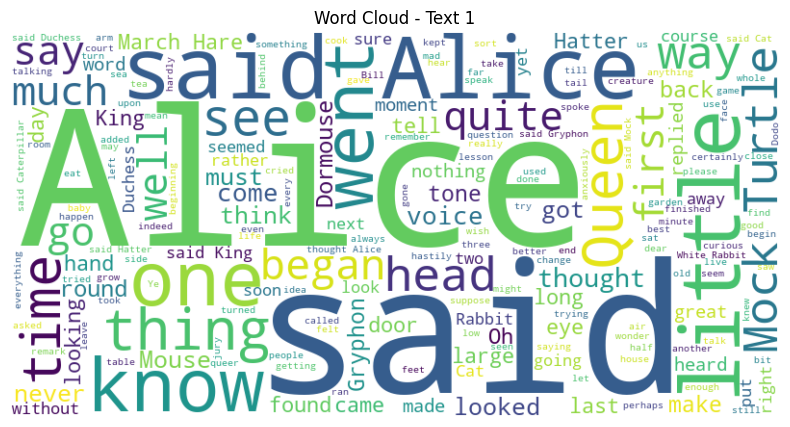

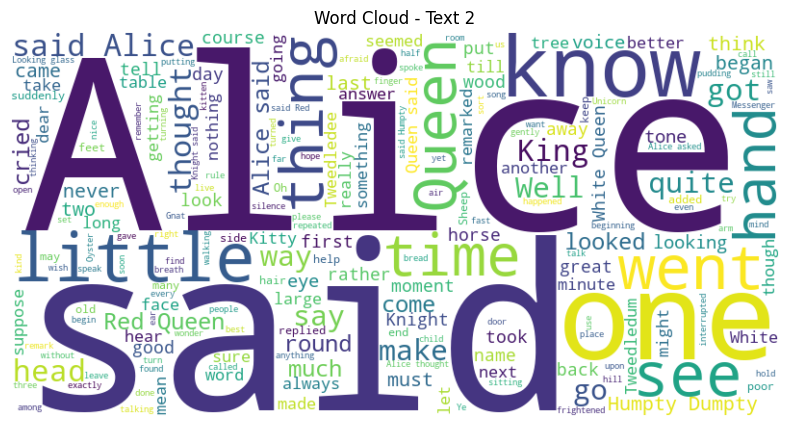

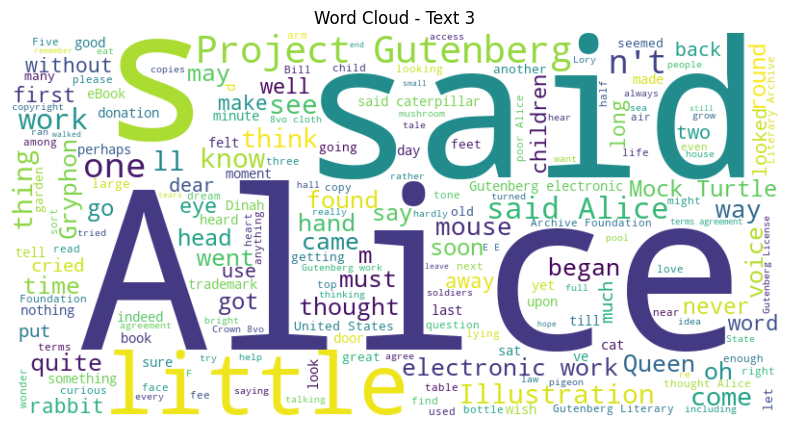

In [53]:
# Join tokens back to text for each book
texts_for_wordcloud = [' '.join(tokens) for tokens in filtered_corpus]

# Generate and plot word clouds
for i, text in enumerate(texts_for_wordcloud):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Text {i+1}')
    plt.show()

#### Step 2 - 2. Use BoW method to check the five most frequent words in all the books

In [57]:
# Rejoin tokens for each text
texts_for_bow = [' '.join(tokens) for tokens in filtered_corpus]

# Create CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the texts
X = vectorizer.fit_transform(texts_for_bow)

# Get feature names (the vocabulary)
feature_names = vectorizer.get_feature_names_out()

# For each document, get the top 5 words
for i in range(X.shape[0]):
    # Convert the row to array
    counts = X[i].toarray().flatten()
    
    # Get indices of top 5 words
    top_indices = counts.argsort()[-5:][::-1]
    
    print(f"\n--- Top 5 words in Text {i+1} ---\n")
    for idx in top_indices:
        word = feature_names[idx]
        count = counts[idx]
        print(f"{word}: {count}")


--- Top 5 words in Text 1 ---

said: 461
alice: 386
little: 127
one: 100
know: 85

--- Top 5 words in Text 2 ---

said: 472
alice: 451
queen: 185
one: 152
like: 124

--- Top 5 words in Text 3 ---

alice: 192
said: 168
gutenberg: 93
little: 89
project: 85


### Step 3 - Print BoW with document number, index, and counts

In [59]:
# Print detailed info for the top 5 words in each document
for i in range(X.shape[0]):
    counts = X[i].toarray().flatten()
    top_indices = counts.argsort()[-5:][::-1]

    print(f"\n--- Document number: {i} ---\n")
    for idx in top_indices:
        word = feature_names[idx]
        count = counts[idx]
        print(f"Index: {idx} | Word: '{word}' | Count: {count}")


--- Document number: 0 ---

Index: 3222 | Word: 'said' | Count: 461
Index: 119 | Word: 'alice' | Count: 386
Index: 2220 | Word: 'little' | Count: 127
Index: 2593 | Word: 'one' | Count: 100
Index: 2090 | Word: 'know' | Count: 85

--- Document number: 1 ---

Index: 3222 | Word: 'said' | Count: 472
Index: 119 | Word: 'alice' | Count: 451
Index: 2982 | Word: 'queen' | Count: 185
Index: 2593 | Word: 'one' | Count: 152
Index: 2194 | Word: 'like' | Count: 124

--- Document number: 2 ---

Index: 119 | Word: 'alice' | Count: 192
Index: 3222 | Word: 'said' | Count: 168
Index: 1720 | Word: 'gutenberg' | Count: 93
Index: 2220 | Word: 'little' | Count: 89
Index: 2904 | Word: 'project' | Count: 85


#### Step 4 - Pie Plot of top 5 words

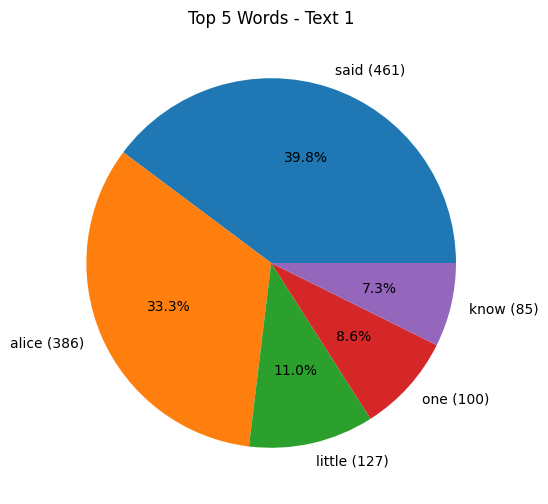

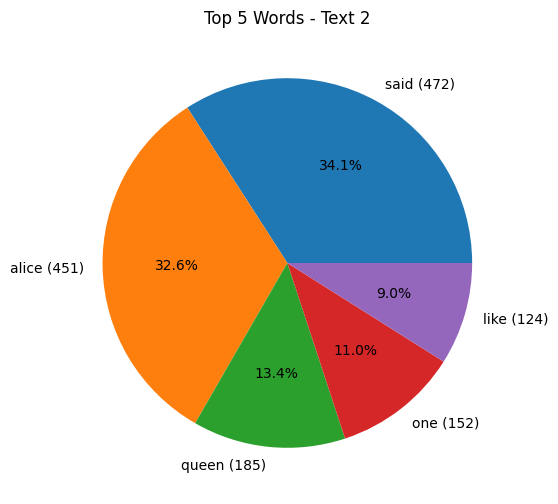

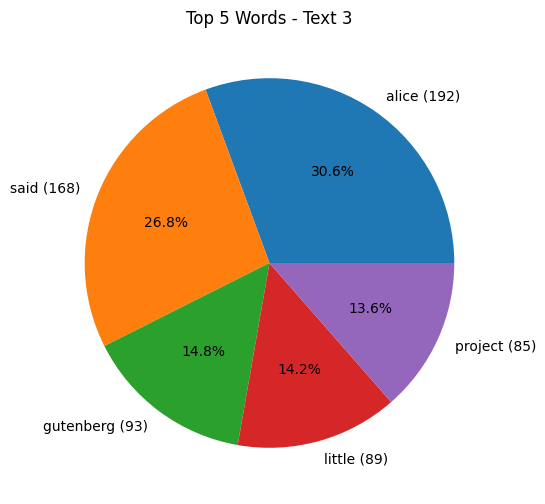

In [58]:
# For each document, create a pie chart of the top 5 words
for i in range(X.shape[0]):
    counts = X[i].toarray().flatten()
    top_indices = counts.argsort()[-5:][::-1]
    
    words = [feature_names[idx] for idx in top_indices]
    freqs = [counts[idx] for idx in top_indices]
    
    plt.figure(figsize=(6,6))
    plt.pie(freqs, labels=[f"{w} ({f})" for w,f in zip(words, freqs)], autopct='%1.1f%%')
    plt.title(f"Top 5 Words - Text {i+1}")
    plt.show()

**Interpretation of the Pie Charts**

The pie charts display the 5 most frequent words in each text using the Bag of Words method.

**Observation:**
- The most frequent words are "said" and "alice" in all texts.
- "Said" appears very often because it is a common verb used in storytelling to indicate dialogue ("she said").
- Other frequent words like "one", "little", or "queen" are typical of narrative style.

**Conclusion:**
Although these words occur frequently, they are not necessarily informative or relevant for understanding the specific content of the books. This limitation is why TF-IDF analysis is often preferred: it downweights common words and highlights more distinctive terms.

### Step 5 - Analyse the outputs: are those words informative?

After generating the Bag of Words and displaying the pie plots, we observed that the most frequent words across all three texts are:

- "said"
- "alice"
- "little"
- "one"
- "know"
- "queen"
- "like"
- "gutenberg"
- "project"

**Observation:**
Most of these words are very common narrative terms or character names. For example, "said" is used to report dialogue, and "alice" is the protagonist. These high-frequency words are expected in this kind of literary text.

In Text 3, "gutenberg" and "project" are frequent because the text includes Project Gutenberg licensing information that was not fully cleaned out.

**Conclusion:**
While these words accurately reflect the vocabulary of the books, they are not necessarily informative. Their high frequency is due to their function (narration, dialogue, legal text) rather than their semantic relevance. This demonstrates a limitation of raw frequency analysis. 

To address this, in the next step we will use TF-IDF (Term Frequency – Inverse Document Frequency) to reduce the weight of such common words and highlight more specific, distinctive terms.

### Step 6 - Create BoW with TF-IDF Vectorizer

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Rejoin tokens for each text
texts_for_tfidf = [' '.join(tokens) for tokens in filtered_corpus]

# Create the TF-IDF Vectorizer with min_df=1 and max_df=2 (small corpus)
vectorizer_tfidf = TfidfVectorizer(min_df=1, max_df=2)

# Fit and transform the texts
X_tfidf = vectorizer_tfidf.fit_transform(texts_for_tfidf)

# Get feature names
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# For each document, get the top 5 words by TF-IDF score
for i in range(X_tfidf.shape[0]):
    tfidf_scores = X_tfidf[i].toarray().flatten()
    top_indices = tfidf_scores.argsort()[-5:][::-1]
    
    print(f"\n--- Top 5 TF-IDF words in Text {i+1} ---\n")
    for idx in top_indices:
        word = feature_names_tfidf[idx]
        score = tfidf_scores[idx]
        print(f"{word}: {score:.4f}")


--- Top 5 TF-IDF words in Text 1 ---

hatter: 0.3701
turtle: 0.2965
mock: 0.2815
duchess: 0.2776
gryphon: 0.2764

--- Top 5 TF-IDF words in Text 2 ---

knight: 0.3752
dumpty: 0.3489
humpty: 0.3489
tweedledum: 0.2238
tweedledee: 0.1712

--- Top 5 TF-IDF words in Text 3 ---

ll: 0.3135
illustration: 0.3054
electronic: 0.2170
foundation: 0.2009
gryphon: 0.1650


### Step 7 - Create pie plots of TF-IDF top words

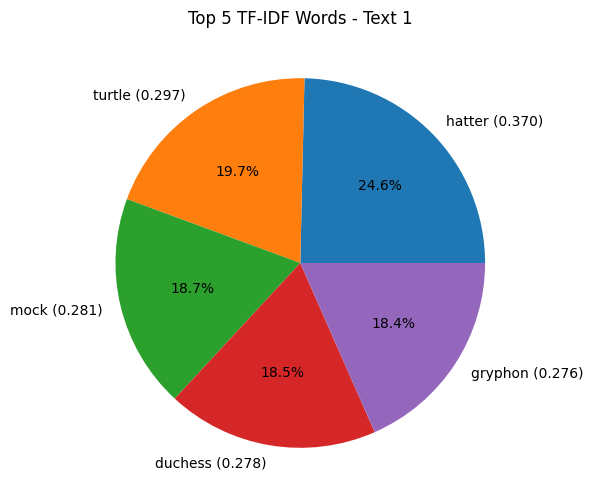

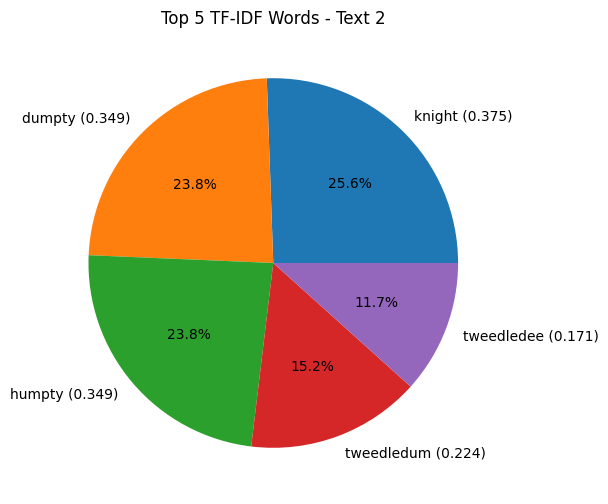

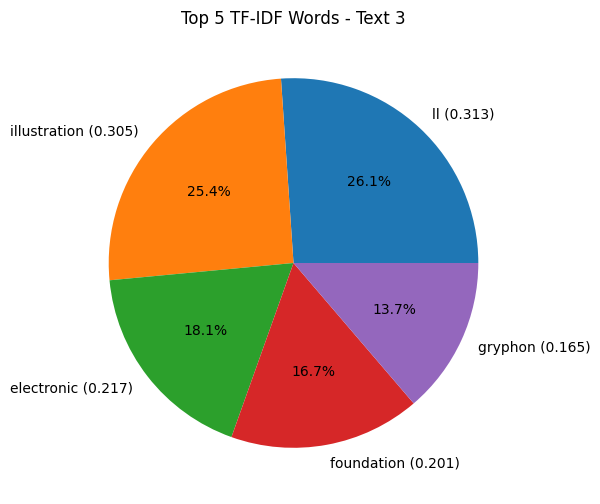

In [62]:
# Pie plots for each document
for i in range(X_tfidf.shape[0]):
    tfidf_scores = X_tfidf[i].toarray().flatten()
    top_indices = tfidf_scores.argsort()[-5:][::-1]
    
    words = [feature_names_tfidf[idx] for idx in top_indices]
    scores = [tfidf_scores[idx] for idx in top_indices]
    
    plt.figure(figsize=(6,6))
    plt.pie(scores, labels=[f"{w} ({s:.3f})" for w,s in zip(words, scores)], autopct='%1.1f%%')
    plt.title(f"Top 5 TF-IDF Words - Text {i+1}")
    plt.show()

### Interpretation of the TF-IDF Outputs

After applying TF-IDF vectorization, we observe that the most relevant words are very different from the simple frequency counts obtained with Bag of Words:

**Text 1:**
- "hatter", "turtle", "mock", "duchess", "gryphon"

These words are names of characters and creatures that are specific to the story. They are much more informative than generic words like "said" or "alice".

**Text 2:**
- "knight", "dumpty", "humpty", "tweedledum", "tweedledee"

Again, these are distinctive characters and references from the book *Through the Looking-Glass*. They help to identify the unique content of this text.

**Text 3:**
- "ll", "illustration", "electronic", "foundation", "gryphon"

Some of these words (like "illustration", "electronic", "foundation") are related to Project Gutenberg metadata that remained in the text. However, "gryphon" is still relevant to the story.

**Conclusion:**
TF-IDF helps to highlight words that are more specific to each document and downweights very frequent but generic words. This approach provides a better representation of what makes each text unique.